### Unidad 1: Taller de resolución de problemas de clasificación automática

<h1> Notebook 3 - Introducción a árboles de decisión</h1>

En este notebook, utilizaremos y describiremos el algorítmo de *árbol de decisión* para la clasificación automática. En un primer tiempo, ilustraremos su uso a través de la librería scikit-learn. Luego, implementaremos una versión desde cero para describir más precisamente el funcionamiento de este algorítmo.

### 1. Preparación del dataset 

In [45]:
import pandas as pd

In [46]:
#leemos el dataset

In [94]:
dataset = pd.read_csv("datos/universe.csv")
dataset=dataset[dataset['class'] != 'QSO']
dataset[:8]

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515


In [95]:
#visualizacion

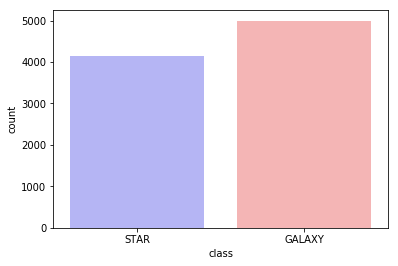

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="class", data=dataset, palette="bwr")
plt.show()

In [97]:
##Utilizando arbol de decisión

In [98]:
#selección de la primera columna de nuestro dataset (tamaño de la populacion)
X = dataset.iloc[0:len(dataset),0:13]
#selección de la segunda columna de nuestro dataset (volumen de negocio)
y = dataset.iloc[0:len(dataset),13]

In [99]:
#comienza el entrenamiento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

from sklearn import tree
#Entrenamiento
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [100]:
#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1413   85]
 [  98 1149]]
              precision    recall  f1-score   support

      GALAXY       0.94      0.94      0.94      1498
        STAR       0.93      0.92      0.93      1247

   micro avg       0.93      0.93      0.93      2745
   macro avg       0.93      0.93      0.93      2745
weighted avg       0.93      0.93      0.93      2745



In [101]:
##random forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15)
clf = clf.fit(X_train, y_train)

#Predicciones
y_pred = clf.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1427   71]
 [ 106 1141]]
              precision    recall  f1-score   support

      GALAXY       0.93      0.95      0.94      1498
        STAR       0.94      0.91      0.93      1247

   micro avg       0.94      0.94      0.94      2745
   macro avg       0.94      0.93      0.93      2745
weighted avg       0.94      0.94      0.94      2745



In [103]:
##Regresion logistica

In [104]:
from sklearn.linear_model import LogisticRegression

#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/home/javier/.conda/envs/base_datos2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [105]:
#Predicciones
y_pred = LogReg.predict(X_test)
#Evaluación del rendimiento del clasificador
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
#Print de la matriz de confusión
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[1469   29]
 [ 340  907]]
              precision    recall  f1-score   support

      GALAXY       0.81      0.98      0.89      1498
        STAR       0.97      0.73      0.83      1247

   micro avg       0.87      0.87      0.87      2745
   macro avg       0.89      0.85      0.86      2745
weighted avg       0.88      0.87      0.86      2745

